In [17]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_path = os.path.abspath('.') + '/../data/'
train = pd.read_csv(data_path + "train.csv")
test = pd.read_csv(data_path + "test.csv")
sample_submission = pd.read_csv(data_path + "sample_submission.csv")

数据量

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

数据类别

Features not used for indexing (latitude, longitude, year and week number) can be split into 8 groups: CarbonMonoxide, Cloud, Formaldehyde, NitrogenDioxide, Ozone, SulphurDioxide, UvAerosolIndex and UvAerosolLayerHeight.

In [19]:
{col.split('_')[0] for col in train.columns}

{'CarbonMonoxide',
 'Cloud',
 'Formaldehyde',
 'ID',
 'NitrogenDioxide',
 'Ozone',
 'SulphurDioxide',
 'UvAerosolIndex',
 'UvAerosolLayerHeight',
 'emission',
 'latitude',
 'longitude',
 'week',
 'year'}

年、周 特征分析

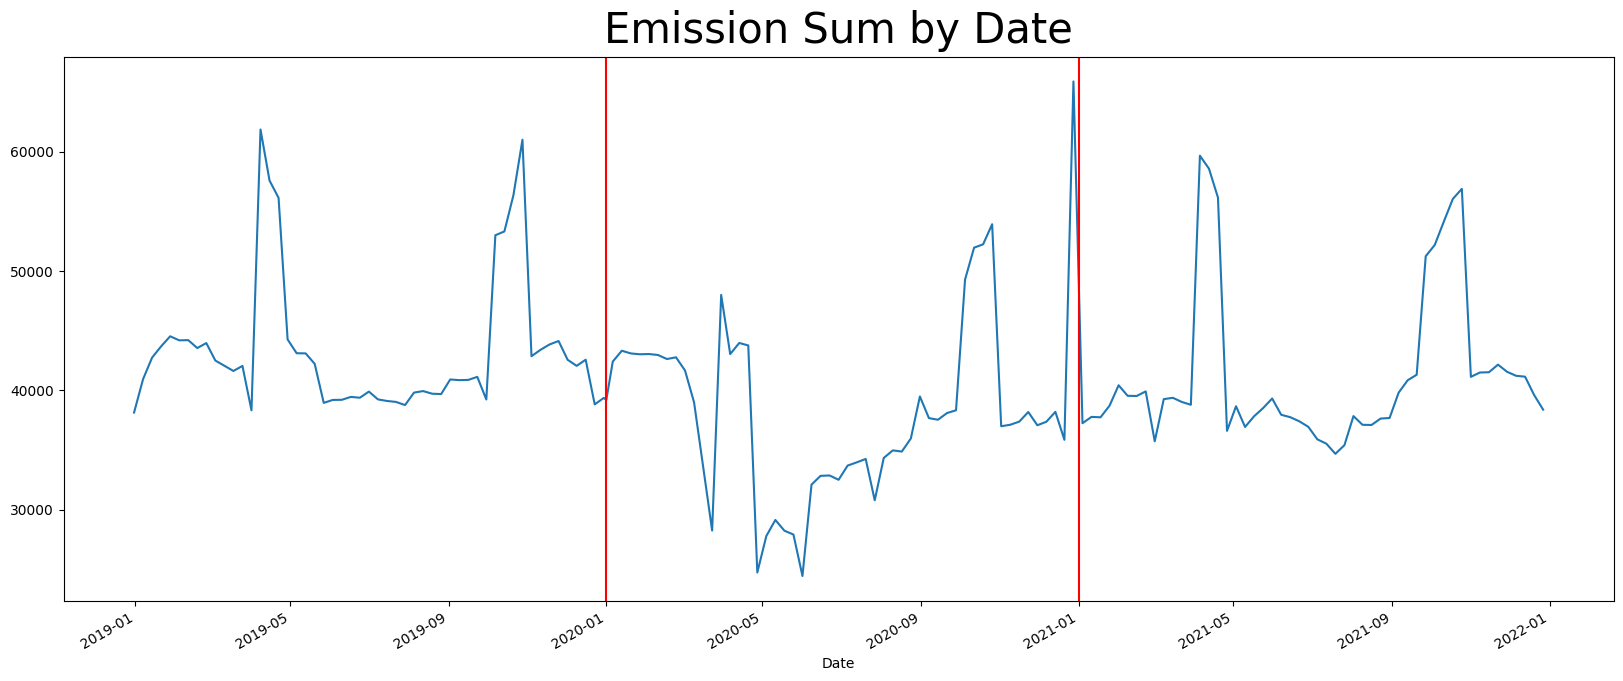

In [20]:
train_plot = train.copy(deep=True)
train_plot['date'] = pd.to_datetime(train_plot['year'].astype(str) + '-' + train_plot['week_no'].astype(str) + '-1', format='%Y-%W-%w')

train_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 8), xlabel='Date')

# plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='red', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "-", color='red')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "-", color='red')

# plt.text(pd.Timestamp ('2020-05-30'), 60000, "Virus", size = 20)

plt.title('Emission Sum by Date', size=30, pad=10)
plt.show()